In [14]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [4]:

data_path = '/disk/xray0/tl3/datasets/wf-phase-retrieval/data/train_Euclid_res_2000_TrainStars_id_010_8_bins.npy'

data = np.load(data_path, allow_pickle=True)[()]
data.keys()

dict_keys(['stars', 'noisy_stars', 'super_res_stars', 'positions', 'SEDs', 'zernike_coef', 'C_poly', 'parameters'])

In [25]:

data_id = 10

# data['SEDs'][data_id,:,0]


save_dir = '/disk/xray0/tl3/outputs/tmp/utsav_PSF/'


save_dict = {
    'psf_euclid_resolution': data['stars'][data_id,:,:],
    'psf_super_resolution': data['super_res_stars'][data_id,:,:],
    'stellar_SED': data['SEDs'][data_id,:,1],
    'stellar_SED_wavelength': data['SEDs'][data_id,:,0],
}


np.save('{:s}euclid_PSF.npy'.format(save_dir), save_dict, allow_pickle=True)


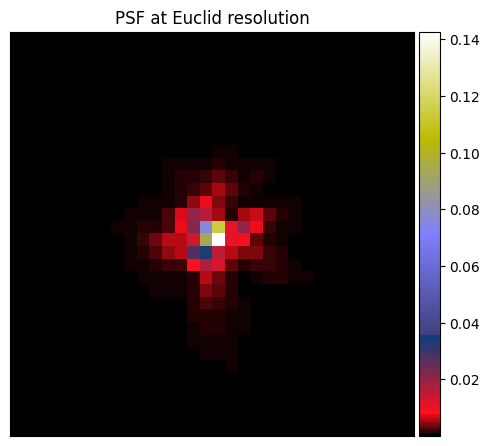

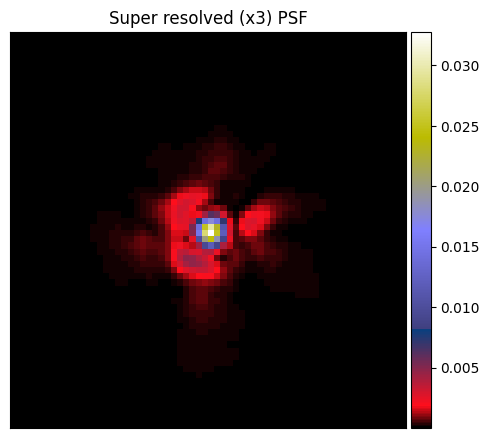

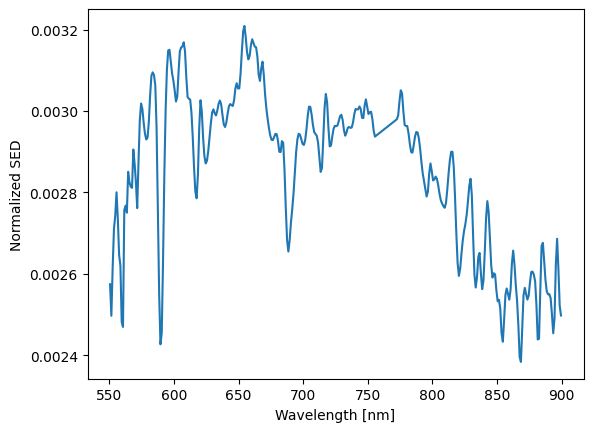

In [26]:
fig = plt.figure(figsize=(5,5))
plt.title('PSF at Euclid resolution')
axs = plt.gca()
im = axs.imshow(data['stars'][data_id,:,:], cmap='gist_stern')
divider = make_axes_locatable(axs)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(im, cax=cax)#, extend='both')
axs.set_xticks([])
axs.set_yticks([])
plt.tight_layout()
plt.savefig('{:s}PSF_Euclid_resolution.pdf'.format(save_dir))
plt.show()

fig = plt.figure(figsize=(5,5))
plt.title('Super resolved (x3) PSF')
axs = plt.gca()
im = axs.imshow(data['super_res_stars'][data_id,:,:], cmap='gist_stern')
divider = make_axes_locatable(axs)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(im, cax=cax)#, extend='both')
axs.set_xticks([])
axs.set_yticks([])
plt.tight_layout()
plt.savefig('{:s}PSF_super_resolution_x3.pdf'.format(save_dir))
plt.show()



plt.figure()
plt.plot(data['SEDs'][data_id,:,0], data['SEDs'][data_id,:,1])
plt.xlabel('Wavelength [nm]')
plt.ylabel('Normalized SED')
plt.savefig('{:s}stellar_SED.pdf'.format(save_dir))
plt.show()
